# SVC : Sign Language Digits

## We charge the Libs

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

## we load ours data

In [2]:
x_full = np.load('data/X.npy')
y_full = np.load('data/Y.npy')
X_full = x_full.reshape(2062, 64, 64, -1)
X_full.shape

(2062, 64, 64, 1)

## We split ours data in train and dev set with a fixed seed

In [3]:
fixed_state = 42
x_train, x_dev = train_test_split(X_full, test_size = 0.3, random_state=fixed_state)
y_train, y_dev = train_test_split(y_full, test_size = 0.3, random_state=fixed_state)
x_train.shape

(1443, 64, 64, 1)

In [4]:
y_train.shape

(1443, 10)

## We reshape the x in a 2d array 

In [5]:
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_dev_flat = x_dev.reshape(x_dev.shape[0], x_dev.shape[1]*x_dev.shape[2])
x_train_flat.shape

(1443, 4096)

## We reshape the y 

In [6]:
y_train_flat = [list(y).index(1) for y in y_train]
y_dev_flat = [list(y).index(1) for y in y_dev]
y_train_flat

[1,
 4,
 1,
 4,
 9,
 5,
 1,
 1,
 9,
 4,
 7,
 5,
 5,
 0,
 8,
 6,
 4,
 4,
 4,
 2,
 2,
 6,
 3,
 7,
 7,
 6,
 4,
 4,
 4,
 1,
 8,
 6,
 3,
 2,
 4,
 7,
 8,
 7,
 6,
 6,
 7,
 4,
 4,
 6,
 8,
 2,
 5,
 4,
 7,
 4,
 5,
 2,
 6,
 1,
 9,
 1,
 9,
 1,
 2,
 9,
 8,
 1,
 8,
 7,
 0,
 3,
 7,
 9,
 7,
 1,
 2,
 6,
 5,
 8,
 6,
 6,
 5,
 9,
 0,
 9,
 5,
 2,
 2,
 0,
 7,
 3,
 8,
 1,
 7,
 8,
 0,
 8,
 3,
 1,
 0,
 7,
 4,
 4,
 7,
 2,
 2,
 7,
 1,
 8,
 0,
 6,
 4,
 5,
 7,
 8,
 4,
 4,
 4,
 9,
 8,
 1,
 2,
 8,
 5,
 4,
 4,
 0,
 6,
 6,
 0,
 7,
 9,
 2,
 9,
 0,
 7,
 3,
 3,
 1,
 0,
 7,
 6,
 6,
 0,
 4,
 2,
 7,
 0,
 2,
 6,
 1,
 7,
 2,
 7,
 5,
 3,
 0,
 4,
 3,
 7,
 1,
 6,
 7,
 5,
 1,
 2,
 8,
 3,
 8,
 5,
 1,
 3,
 0,
 9,
 1,
 0,
 0,
 2,
 0,
 8,
 7,
 6,
 7,
 6,
 8,
 2,
 8,
 0,
 6,
 8,
 5,
 4,
 5,
 9,
 2,
 1,
 7,
 9,
 6,
 1,
 9,
 8,
 2,
 5,
 1,
 4,
 3,
 7,
 7,
 1,
 2,
 9,
 5,
 1,
 2,
 3,
 1,
 2,
 7,
 5,
 4,
 0,
 7,
 3,
 4,
 6,
 9,
 3,
 7,
 9,
 4,
 7,
 1,
 4,
 2,
 6,
 5,
 1,
 3,
 5,
 0,
 0,
 4,
 9,
 6,
 7,
 1,
 9,
 3,
 7,
 4,
 6,
 1,
 4,
 0,


## We initialyse the model

In [7]:
model = SVC(gamma='scale')

## We  fit the model

In [9]:
model.fit(x_train_flat, y_train_flat)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## we get prediction in the dev set

In [10]:
predictions = model.predict(x_dev_flat)
predictions

array([3, 9, 3, 9, 0, 0, 8, 2, 5, 9, 4, 9, 7, 1, 2, 3, 0, 5, 0, 7, 0, 2,
       3, 1, 9, 1, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 1, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 2, 2, 1, 0, 6, 8, 2, 8, 2, 7, 2, 7, 5, 9,
       2, 2, 9, 4, 1, 1, 2, 7, 4, 9, 9, 5, 3, 8, 2, 9, 2, 0, 0, 0, 0, 4,
       1, 2, 5, 3, 7, 4, 7, 4, 2, 2, 8, 9, 2, 0, 9, 0, 3, 1, 8, 8, 8, 7,
       5, 8, 3, 3, 2, 5, 6, 1, 2, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 8, 9, 5, 8, 2, 2, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 5, 2,
       6, 2, 6, 6, 1, 1, 4, 5, 9, 8, 2, 2, 4, 7, 6, 9, 3, 7, 2, 9, 1, 3,
       7, 2, 0, 2, 1, 7, 4, 2, 1, 6, 3, 2, 4, 8, 8, 6, 8, 3, 2, 0, 8, 3,
       8, 1, 4, 7, 0, 2, 2, 4, 2, 5, 8, 8, 9, 0, 2, 8, 5, 3, 1, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 6, 5, 8, 4, 7, 6, 2, 1, 5, 4, 6, 6, 9, 3,
       1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 4, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 4, 9, 2, 7, 7, 3, 6, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 8, 1, 0, 0,

## We count good and bad predictions

In [11]:
predict_ok = []
true = 0
false = 0
for i in range(len(predictions)):
    if predictions[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 518
Nombres de mauvaise prédictions : 101


In [12]:
matrix_conf = confusion_matrix(list(y_dev_flat), predictions)
matrix_conf

array([[54,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 65,  1,  2,  0,  1,  1,  0,  0,  0],
       [ 0,  1, 60,  3,  1,  4,  2,  0,  5,  0],
       [ 0,  1,  5, 51,  1,  0,  2,  0,  3,  0],
       [ 0,  2,  0,  1, 46,  1,  1,  1,  0,  0],
       [ 2,  1,  6,  0,  0, 42,  1,  0,  2,  1],
       [ 2,  1,  9,  7,  0,  1, 41,  0,  1,  3],
       [ 0,  0,  0,  0,  1,  0,  0, 58,  2,  1],
       [ 0,  0,  9,  3,  5,  0,  0,  0, 43,  0],
       [ 1,  0,  0,  0,  0,  0,  2,  0,  0, 58]], dtype=int64)

In [13]:
df_cm = pd.DataFrame(matrix_conf, range(10), range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,54,0,0,0,0,0,1,0,0,0
1,0,65,1,2,0,1,1,0,0,0
2,0,1,60,3,1,4,2,0,5,0
3,0,1,5,51,1,0,2,0,3,0
4,0,2,0,1,46,1,1,1,0,0
5,2,1,6,0,0,42,1,0,2,1
6,2,1,9,7,0,1,41,0,1,3
7,0,0,0,0,1,0,0,58,2,1
8,0,0,9,3,5,0,0,0,43,0
9,1,0,0,0,0,0,2,0,0,58


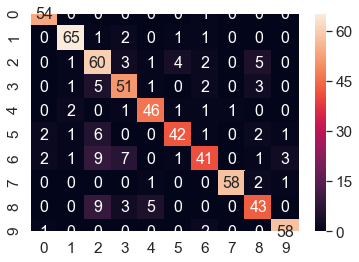

In [16]:
#plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf, annot=True,annot_kws={"size": 16})# font size

plt.show() 

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print (accuracy_score(y_dev_flat, predictions))

0.8368336025848142


# Convolution NN 

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling1D
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [20]:
x_train.shape
x_dev.shape
y_train.shape
y_dev.shape

(619, 10)

In [21]:
# num_filters = 4
# filter_size = 3
# pool_size = 2

# num_filters2 = 8
# filter_size2 = 3
# pool_size2 = 2

# num_filters3 = 16
# filter_size3 = 3
# pool_size3 = 2

# num_filters4 = 16
# filter_size4 = 3
# pool_size4 = 2

# num_filters4 = 10
# filter_size4 = 3
# pool_size4 = 4

In [22]:
# Build the model.

model = Sequential([
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(8, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),

  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(16, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
    
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Conv2D(32, (3,3), strides=1, input_shape=(64, 64, 1), activation='elu'),
  MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  Dropout(0.4),
  
  Conv2D(32, (1,1), strides=1, input_shape=(64, 64, 1), activation='elu'),
  Dropout(0.4),  
    
  #Conv2D(10, (1,1), strides=1, input_shape=(64, 64, 1), activation='elu'),  
  
  Flatten(),
  Dense(10, activation='softmax'),  
    
])

In [23]:
# Compile the model.
learning_rate = 0.01
model.compile(
  'RMSprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  #optimizer=SGD(lr=learning_rate)
)

In [24]:
# callbacks = [EarlyStopping(monitor='val_accuracy', patience=5),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [25]:
# Train the model.
history = model.fit(
  x_train,y_train,
# callbacks=callbacks, # Early stopping
  epochs=50,
    verbose=1,
#     batch_size=100,
  validation_data=(x_dev,y_dev),
)

Train on 1443 samples, validate on 619 samples
Epoch 1/50
1443/1443 [==============================] - 8s 6ms/step - loss: 2.3322 - accuracy: 0.0887 - val_loss: 2.2765 - val_accuracy: 0.1050
Epoch 2/50
1443/1443 [==============================] - 7s 5ms/step - loss: 2.0937 - accuracy: 0.2599 - val_loss: 1.6040 - val_accuracy: 0.4281
Epoch 3/50
1443/1443 [==============================] - 7s 5ms/step - loss: 1.3306 - accuracy: 0.5509 - val_loss: 1.0115 - val_accuracy: 0.6430
Epoch 4/50
1443/1443 [==============================] - 8s 5ms/step - loss: 1.0683 - accuracy: 0.6452 - val_loss: 1.4529 - val_accuracy: 0.4637
Epoch 5/50
1443/1443 [==============================] - 7s 5ms/step - loss: 0.9382 - accuracy: 0.6895 - val_loss: 0.9194 - val_accuracy: 0.6397
Epoch 6/50
1443/1443 [==============================] - 8s 5ms/step - loss: 0.8302 - accuracy: 0.7228 - val_loss: 0.5655 - val_accuracy: 0.8271
Epoch 7/50
1443/1443 [==============================] - 7s 5ms/step - loss: 0.7676 - accu

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)       

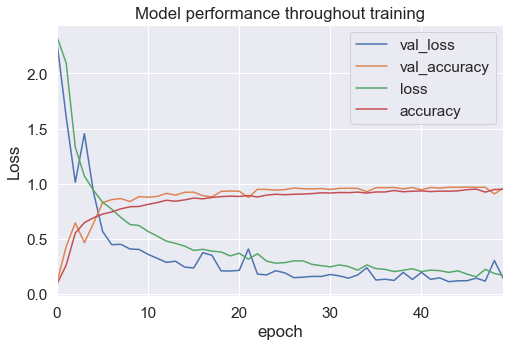

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
predictions = model.predict_classes(x_dev)
predictions

array([6, 9, 3, 9, 0, 5, 8, 2, 5, 9, 4, 9, 7, 1, 3, 3, 0, 5, 0, 7, 0, 8,
       3, 6, 9, 2, 7, 3, 5, 9, 8, 5, 4, 6, 4, 6, 3, 1, 9, 2, 7, 7, 3, 1,
       1, 2, 0, 7, 8, 9, 1, 9, 6, 2, 1, 0, 6, 8, 2, 8, 8, 7, 2, 7, 5, 9,
       2, 3, 6, 4, 1, 1, 5, 7, 4, 9, 9, 4, 3, 8, 8, 9, 2, 0, 9, 0, 0, 4,
       1, 2, 5, 4, 7, 4, 7, 4, 2, 2, 8, 7, 2, 0, 9, 0, 2, 1, 7, 8, 8, 7,
       2, 8, 3, 3, 2, 2, 6, 1, 5, 5, 5, 0, 1, 5, 8, 2, 6, 5, 1, 0, 3, 1,
       9, 9, 8, 3, 8, 9, 2, 2, 2, 6, 2, 6, 6, 1, 6, 2, 5, 4, 9, 2, 1, 2,
       6, 2, 6, 6, 1, 1, 7, 5, 9, 8, 6, 2, 4, 7, 6, 9, 8, 8, 2, 9, 1, 6,
       7, 6, 0, 6, 1, 7, 4, 8, 1, 3, 5, 2, 4, 2, 8, 6, 8, 3, 2, 0, 8, 8,
       8, 5, 4, 7, 0, 8, 2, 4, 2, 5, 5, 8, 9, 0, 2, 8, 5, 3, 4, 3, 5, 0,
       6, 4, 6, 1, 7, 5, 4, 1, 9, 5, 8, 4, 7, 6, 3, 1, 5, 4, 6, 4, 9, 3,
       1, 0, 9, 0, 1, 2, 3, 9, 5, 4, 2, 0, 0, 8, 2, 5, 9, 2, 4, 7, 9, 8,
       3, 7, 3, 7, 7, 1, 1, 1, 8, 9, 5, 7, 7, 3, 1, 7, 5, 3, 6, 9, 1, 9,
       2, 9, 8, 3, 0, 7, 0, 8, 0, 6, 5, 8, 1, 0, 0,

In [29]:
predict_ok = []
true = 0
false = 0
for i in range(len(predictions)):
    if predictions[i] == y_dev_flat[i]:
        p = True 
        true += 1
        
    else:
        p = False
        false += 1
    
    predict_ok.append(p)
        
        
predict_ok
print('Nombres de prédictions Valide :',true)
print('Nombres de mauvaise prédictions :',false)

Nombres de prédictions Valide : 594
Nombres de mauvaise prédictions : 25


In [30]:
matrix_conf = confusion_matrix(list(y_dev_flat), predictions)
matrix_conf

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 67,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 71,  0,  0,  2,  1,  0,  2,  0],
       [ 0,  0,  0, 60,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0, 51,  0,  1,  0,  0],
       [ 1,  0,  0,  1,  0,  0, 63,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  2,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 61]], dtype=int64)

In [31]:
df_cm = pd.DataFrame(matrix_conf, range(10), range(10))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,54,0,0,0,1,0,0,0,0,0
1,0,67,0,0,3,0,0,0,0,0
2,0,0,71,0,0,2,1,0,2,0
3,0,0,0,60,0,1,0,0,2,0
4,0,1,0,0,51,0,0,0,0,0
5,0,0,3,0,0,51,0,1,0,0
6,1,0,0,1,0,0,63,0,0,0
7,0,0,0,0,0,0,0,60,2,0
8,0,0,0,0,4,0,0,0,56,0
9,0,0,0,0,0,0,0,0,0,61


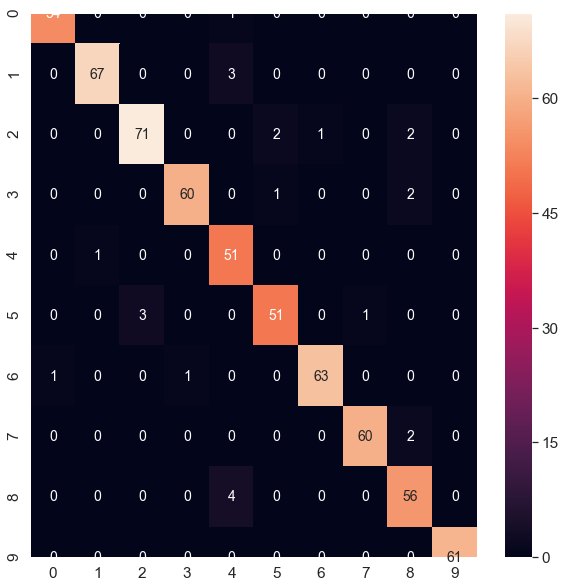

In [32]:
plt.figure(figsize = (10,10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(matrix_conf, annot=True,annot_kws={"size": 14})# font size
plt.show() 

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print (accuracy_score(y_dev_flat, predictions))

0.9596122778675282
